In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from e2evideo import video_preprocessing, image_preprocessing
from demo_helpers import display_video_frames

# Frames Extraction

In [3]:
videos_config = video_preprocessing.VideoConfig(
    videos_folder = "toadstool",
    video_format = "avi",
    image_format = "jpg",
    sampling_mode = "per_minute",
    num_frames = 5,
    output_folder = "toadstool",
    back_sub = None,
    save_frames ='True'
)

processor = video_preprocessing.VideoPreprocessor(videos_config)
frames = processor.process_video()




Removing existing frames...
Extracting frames from toadstool/participant_5_video.avi...
No background subtraction algorithm                     provided : None
Done! 36 images of format JPG is saved in toadstool/participant_5_video


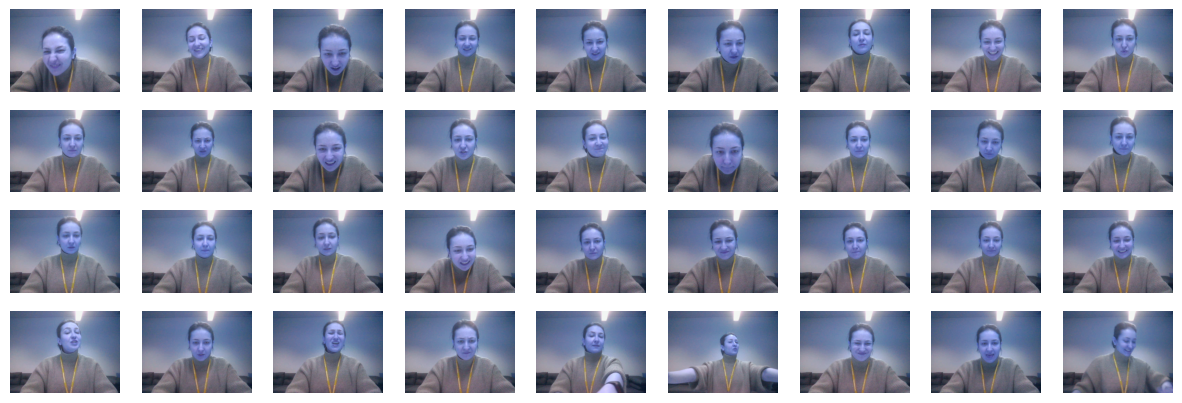

In [4]:

display_video_frames(frames= frames, n_rows = 4)


# Image Pre-processing 

## Gray-scale 

In [5]:
images_config = image_preprocessing.ImagesConfig(
    dir= 'toadstool/participant_5_video',
    img_format= '*.jpg',
    resize= False,
    gray_scale= True,
    output= 'toadstool/participant_5.npz'
)

image_prepocessor = image_preprocessing.ImagePreprocessing(images_config)
images, _ = image_prepocessor.get_images()

In [6]:
images.shape

(1, 36, 480, 640)

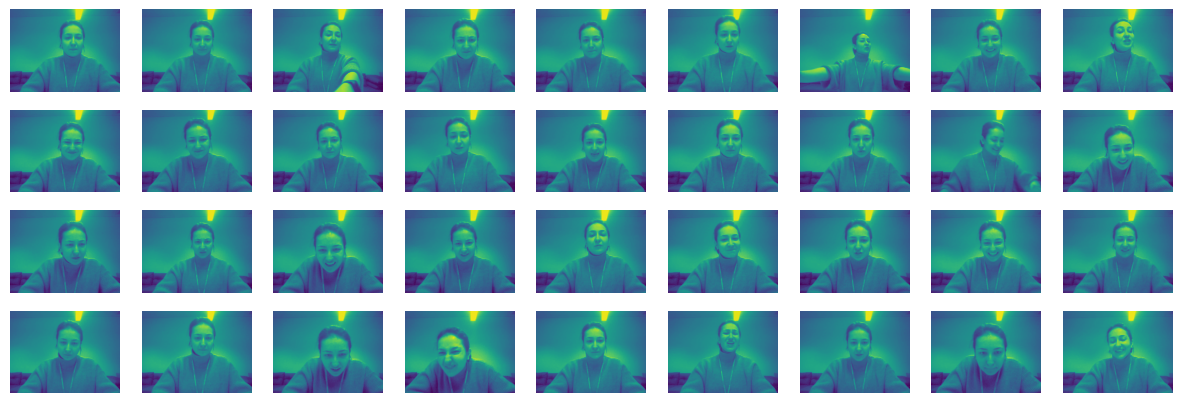

In [7]:
processed_frames = [images[0, i, :, :] for i in range(images.shape[1]) ]
display_video_frames(frames=processed_frames, n_rows = 4)


## Resize 

In [8]:
images_config = image_preprocessing.ImagesConfig(
    dir= 'toadstool/participant_5_video',
    img_format= '*.jpg',
    resize= True,
    img_height=224,
    img_width=224,
    gray_scale= True,
    output= 'toadstool/participant_5.npz'
)

image_prepocessor = image_preprocessing.ImagePreprocessing(images_config)
images, _ = image_prepocessor.get_images()

In [10]:
print(images.shape)

(1, 36, 224, 224)


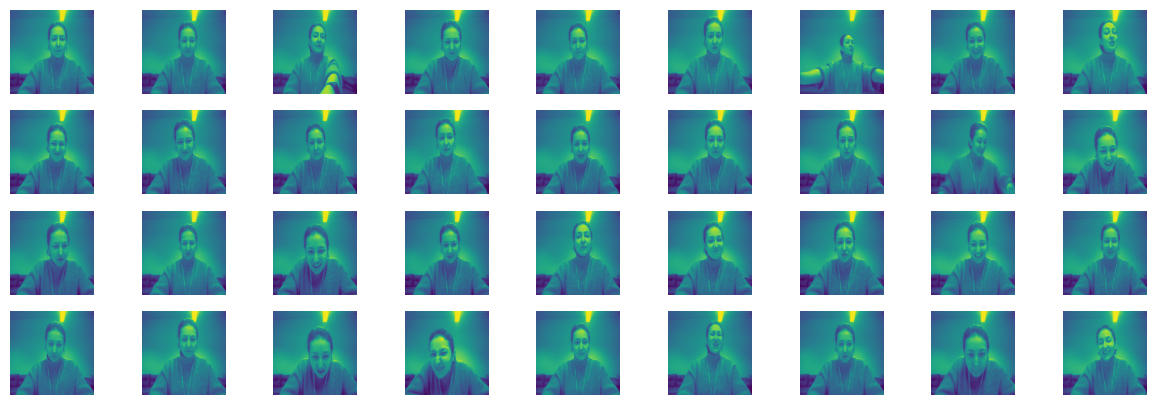

In [9]:
processed_frames = [images[0, i, :, :] for i in range(images.shape[1]) ]
display_video_frames(frames=processed_frames, n_rows = 4)
